In [40]:
import math
import sympy as sym
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [41]:
# a = [[1,2,3], [4,5,6]]
# a = np.asarray(a)
# 2*a

In [42]:
x,y,p = sym.symbols('x,y,p')
w=np.asarray([x,y])

In [43]:
# Domain

def pick():
    x = random.random()
    y = random.random()
    while x+y>=1 or x<=0 or y<=0:
        x = random.random()
        y = random.random()
    return x,y
        

In [44]:
log = math.log
f  = lambda p: -log(1-p[0]-p[1]) - log(p[0]) - log(p[1])

In [45]:
def der_x(w):
    return (1/(1-w[0]-w[1]) - (1/w[0]))

def der_y(w):
    return (1/(1-w[0]-w[1]) - (1/w[1]))

def der_x2(w):
    return ((1/(1-w[0]-w[1])**2) - (1/(w[0]**2)))

def der_y2(w):
    return ((1/(1-w[0]-w[1])**2) - (1/w[1]**2))

def der_xy(w):
    return (1/(1-w[0]-w[1])**2)

der_y2(w)

(-x - y + 1)**(-2) - 1/y**2

In [49]:
# Gradient
def g(w):
    return np.asarray([der_x(w), der_y(w)])
np.mat(g(w))

matrix([[1/(-x - y + 1) - 1/x, 1/(-x - y + 1) - 1/y]], dtype=object)

In [50]:
# Hessian
def h(w):
    return np.asarray([[der_x2(w), der_xy(w)], [der_xy(w), der_y2(w)]]) 
np.mat(h(w))

matrix([[(-x - y + 1)**(-2) - 1/x**2, (-x - y + 1)**(-2)],
        [(-x - y + 1)**(-2), (-x - y + 1)**(-2) - 1/y**2]], dtype=object)

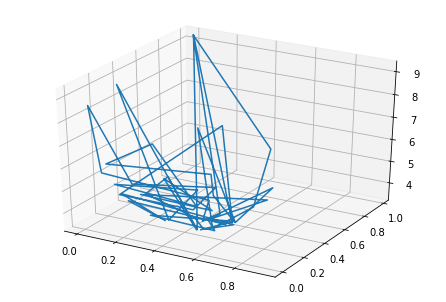

In [23]:
from mpl_toolkits.mplot3d import Axes3D

b =[]
d =[]
nu = []

for i in range(1,51):
    x,y = pick()
    b.append(x)
    d.append(y)
    w = [x,y]
    nu.append(f(w))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(b, d, nu)
plt.show()

In [25]:
# f([0.5,0.4])

In [137]:
def gd():
    x,y  = pick()
    w = np.asarray([x,y])
    print("x = " + str(x))
    print("y = " + str(y))
    print("For a randomly picked initial values of w= " + str(w) + ", the value of f(w) = " + str(f(w)))
    print('\n')
    lr = 1
    prec = 0.0000001
    step_size = [1,1]
    fv = []
    p = []
    p1 =[]
    p2 =[]
    p1.append(x)
    p2.append(y)
    fv.append(f(w))
    lr= 1
    i = 1
    it =[]
    it.append(i)
    while (step_size[0] > prec and step_size[1] > prec):
        prev = w
        w = w - lr*g(w)
        i += 1
        if w[0] <= 0 or w[1] <= 0 or w[0]+w[1] >=1:
            x,y  = pick()
            w = np.asarray([x,y])
            lr = lr - 0.00001
            if lr <= 0:
                lr = lr+ 0.00002

        step_size = abs(prev- w)
        it.append(i)
        p.append(w)
        p1.append(w[0])
        p2.append(w[1])
        fv.append(f(w))

        #print(w)

    print("Optimal w = " + str(w))
    print("For the optimal value of w= " + str(w) + ", the value of f(w) = " + str(f(w)))
    return i,p1, p2, fv, it, w


In [138]:
i,p1, p2, fv, it, wopt_gd = gd()
print(i)

x = 0.6445949189387972
y = 0.34299570525915446
For a randomly picked initial values of w= [0.64459492 0.34299571], the value of f(w) = 5.898473524151637


Optimal w = [0.33333338 0.33333338]
For the optimal value of w= [0.33333338 0.33333338], the value of f(w) = 3.2958368660043957
104333


In [139]:
print(len(it))

104333


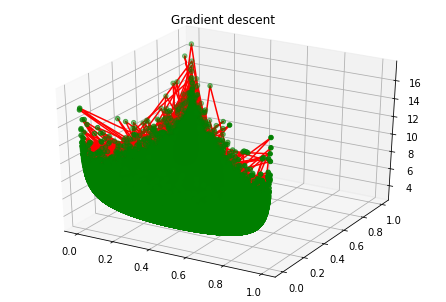

In [140]:
fig = plt.figure()
plt.rcParams['agg.path.chunksize'] = 10000
ax = Axes3D(fig)
ax.plot(p1, p2, fv, c='r')
ax.scatter(p1, p2, fv, c='g')
plt.title("Gradient descent")
plt.show()

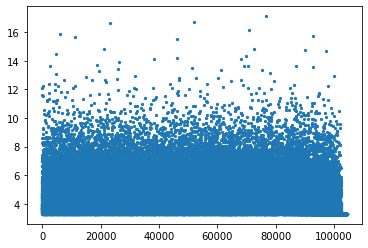

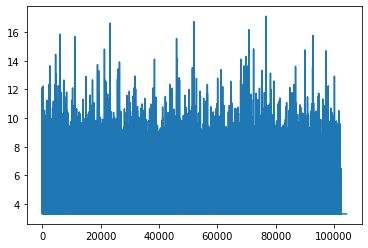

In [141]:
plt.scatter(it,fv, s=5)
plt.show()
plt.plot(it,fv)

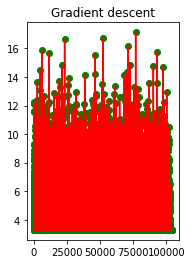

In [142]:
plt.subplot(1,2,2)
plt.scatter(it,fv,c="g")
plt.plot(it,fv,c="r")

plt.title("Gradient descent")
plt.show()

In [143]:
# Newtons Method
def nt():
    from numpy.linalg import inv
    x,y  = pick()
    w = np.asarray([x,y])
    print("x = " + str(x))
    print("y = " + str(y))
    print("For a randomly picked initial values of w= " + str(w) + ", the value of f(w) = " + str(f(w)))
    print('\n')
    lr = 1
    prec = 0.000000001
    step_size = 1
    fv = []
    p = []
    p1 =[]
    p2 =[]
    p1.append(x)
    p2.append(y)
    fv.append(f(w))
    lr= 1
    i = 1
    it =[]
    it.append(i)
    up =[1,1]
    while up[0] > prec and up[1] > prec and step_size > prec:
        prev = f(w)
        h_inv = inv(h(w))
        up = lr*np.asarray(np.matmul(h_inv, g(w)))
        w = w - up
        i += 1
        if w[0] <= 0 or w[1] <= 0 or w[0]+w[1] >=1:
            x,y  = pick()
            w = np.asarray([x,y])
            lr = lr - 0.00001  
            if lr <= 0:
                lr = lr+ 0.00002
        step_size = abs(prev- f(w))
        it.append(i)
        p.append(w)
        p1.append(w[0])
        p2.append(w[1])
        fv.append(f(w))

    print("Optimal w = " + str(w))
    print("For the optimal value of w= " + str(w) + ", the value of f(w) = " + str(f(w)))
    return i,p1, p2, fv, it, w

In [150]:
i,p1, p2, fv, it, wopt_nt = nt()

x = 0.3721303152650529
y = 0.25051833642170707
For a randomly picked initial values of w= [0.37213032 0.25051834], the value of f(w) = 3.3473129051959334


Optimal w = [0.57724903 0.26160868]
For the optimal value of w= [0.57724903 0.26160868], the value of f(w) = 3.7158544891065084
